In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load
from datetime import datetime
import json

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
# load data
df_predf = pd.read_csv('df_pred.csv')

# Prediction Model

## Predictive Model

In [5]:
# train-test split
X = df_predf.drop(columns=['occupancy_rate'])
y = df_predf['occupancy_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# optimized random forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(n_estimators=100,
                           max_depth=None,
                           min_samples_split=2, random_state=42)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# predict on the test set
y_pred = rf.predict(X_test)

# evaluate performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized Random Forest - MSE: {mse:.4f}, R2: {r2:.4f}")

Optimized Random Forest - MSE: 0.0720, R2: 0.6575


In [8]:
# get feature importances from the trained model
importances = rf.feature_importances_

# Ensure feature names match X_train columns
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

                 Feature  Importance
5         maximum_nights    0.295761
6   review_scores_rating    0.136183
4         minimum_nights    0.111008
1           accommodates    0.070645
19     price_range_coded    0.045933
9                     TV    0.036139
10   Dedicated workspace    0.036027
2              bathrooms    0.032236
0              room_type    0.031933
3                   beds    0.029690
18              Elevator    0.026099
12         Self check-in    0.022408
11      Hot water kettle    0.022066
8             Bed linens    0.021112
7       instant_bookable    0.019893
15          Refrigerator    0.019142
13      Air conditioning    0.013691
14             Hot water    0.011992
17                 Bidet    0.009638
16                  Wifi    0.008403


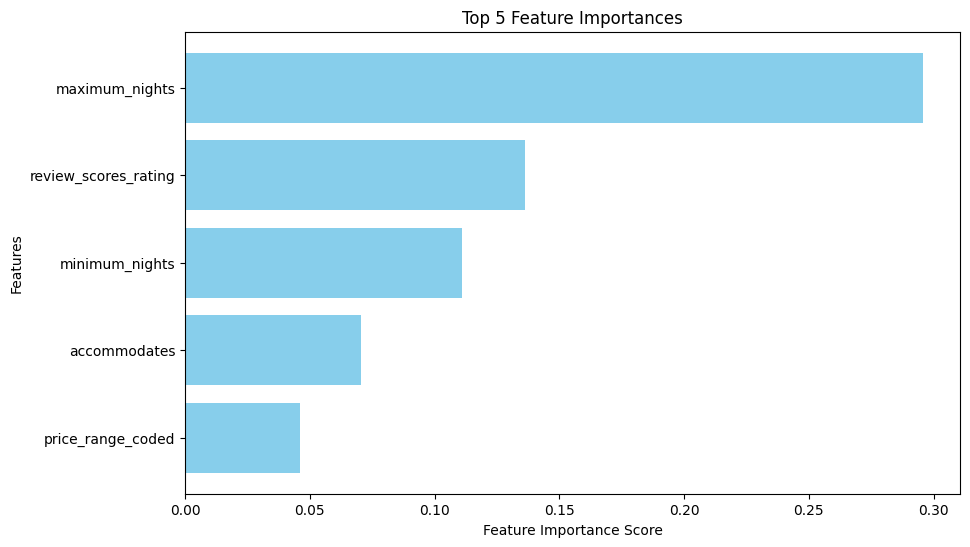

In [10]:
# sort by importance (descending)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# display top features
print(feature_importance_df)

# plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:5], feature_importance_df['Importance'][:5], color='skyblue')
plt.gca().invert_yaxis()  # Invert axis to show highest at top
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 5 Feature Importances")
plt.show()

In [11]:
dump(rf, 'rf_model.joblib')

['rf_model.joblib']

In [12]:
dump(X_train.columns.tolist(), 'rf_features.joblib')

['rf_features.joblib']

In [13]:
metadata = {
    "name": "random_forest_airbnb",
    "metrics": f"mse:{mse:.4f}, r2:{r2:.4f}",
    "version": 1,
    "registration_date": datetime.now().isoformat(),
    "model": "rf_model.joblib",
    "features": "rf_features.joblib"
}

with open('rf_model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)